In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset.
# this dataset is taken from keggle
# https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data?resource=download

dataset = pd.read_csv('gld_price_data.csv')

In [3]:
dataset.head() # this how the dataset look like.

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
dataset.shape

(2290, 6)

In [5]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
## now we are chaecking if any missing value is present or what??
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
# finding correlataion
new = dataset.drop(['Date'],axis=1)
new.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


/var/folders/7j/jsh6v_h14h3bh9vp18pvymmc0000gn/T/ipykernel_10072/884258392.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['GLD'],color='Blue')


<Axes: xlabel='GLD', ylabel='Density'>

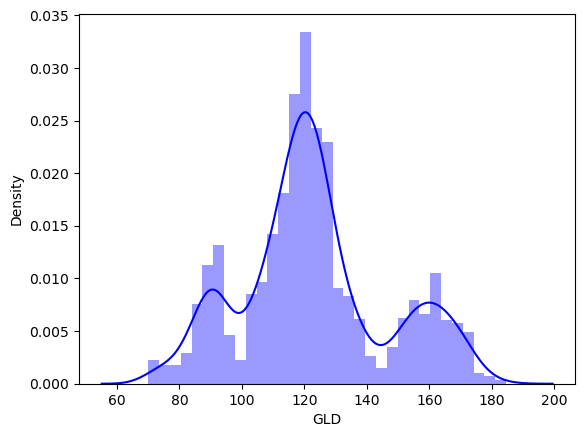

In [8]:
sns.distplot(dataset['GLD'],color='Blue')

<Axes: xlabel='SPX', ylabel='GLD'>

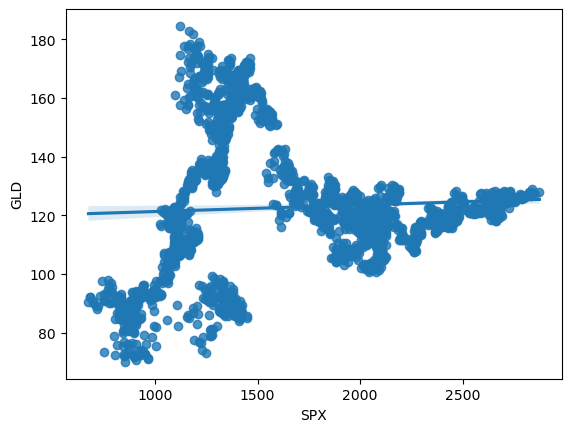

In [9]:
sns.regplot(x='SPX', y='GLD', data=dataset)

<Axes: xlabel='USO', ylabel='GLD'>

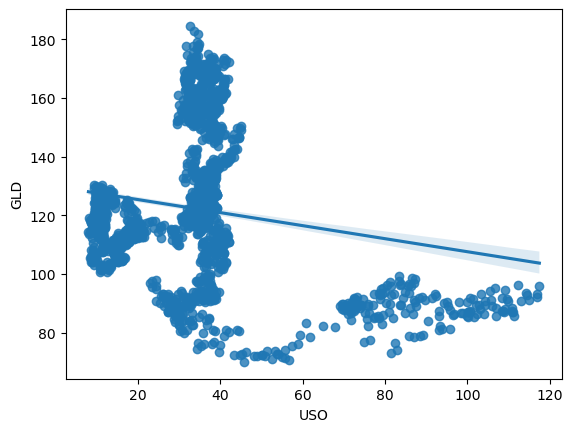

In [10]:
sns.regplot(x='USO', y='GLD', data=dataset)

<Axes: xlabel='EUR/USD', ylabel='GLD'>

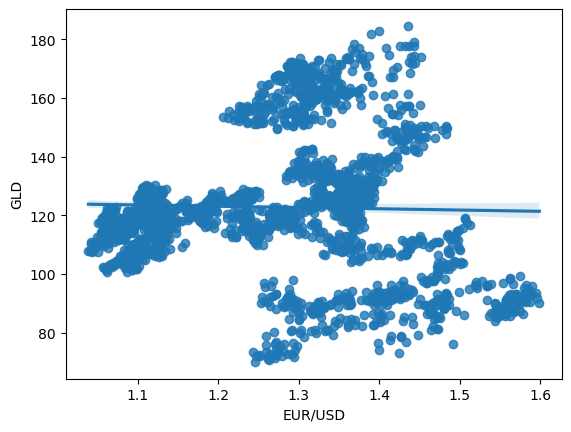

In [11]:
sns.regplot(x='EUR/USD', y='GLD', data=dataset)

In [12]:
X = dataset.drop(['Date','GLD'],axis=1)   # axis=1 when dropping a. cloumn
y = dataset['GLD']

In [13]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [17]:
y_pred = reg.predict(X_test)

In [19]:
print(y_pred)

[168.3714988   82.20499967 116.03290011 127.66040095 120.68560145
 154.73809751 150.21799822 126.16550034 117.44819893 126.06050035
 116.80450073 171.28760115 141.79749849 167.80389871 115.25980011
 118.01180035 138.35260334 169.72659999 159.17730321 158.15489949
 155.11540017 125.29010022 176.1189999  157.09530319 125.14040036
  93.74069973  77.04930053 120.89200003 119.07669913 167.5258999
  88.16100082 125.44020014  91.31760061 117.6205003  121.09249863
 136.75030115 115.64720136 115.04660055 146.42159881 106.94560111
 104.63260242  87.16589795 126.60170053 117.75719989 153.29559908
 119.50150014 108.33820034 108.19169847  93.1074005  127.20719744
  74.69060015 113.7514995  121.18750003 111.12079955 118.79729873
 120.31659951 159.51300039 167.8836012  146.92219647  85.66759867
  94.34950055  86.70659889  90.64240034 118.85380067 126.44720096
 127.5320998  168.95159985 122.19589945 117.53609859  98.77140013
 168.28610155 143.52619832 132.11010283 121.22230184 121.1042994
 119.8417005

In [20]:
# now we have to compare the predicted value and the actual value.
# we are going to use r squared error.
from sklearn import metrics
error_score = metrics.r2_score(y_test,y_pred)
print("R squared error : ", error_score)

R squared error :  0.9892481445662177


In [21]:
y_test = list(y_test)

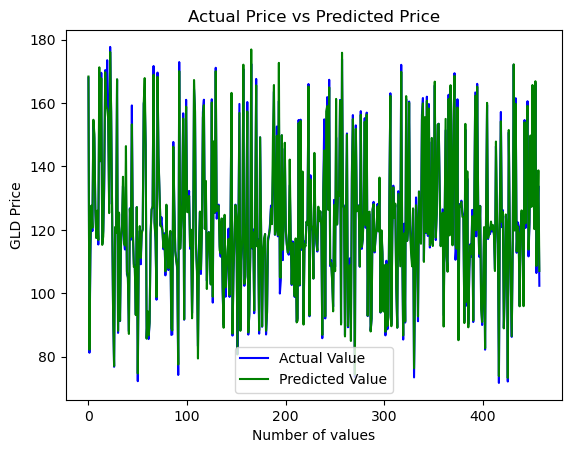

In [22]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [23]:
# now we are going to create pickle file so to use the trained model
import pickle
pickle_out = open("reg.pkl","wb")
pickle.dump(reg,pickle_out)
pickle_out.close()

In [34]:
reg.predict([[2823.810059,12.980000,16.350000,1.240957]])

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([127.60990212])

In [31]:
X_train

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [32]:
print(X_train.iloc[476]) 

SPX        2823.810059
USO          12.980000
SLV          16.350000
EUR/USD       1.240957
Name: 2223, dtype: float64


In [33]:
print(y_train.iloc[476])

127.650002
